# How to Build a Fully Connected, Feedforward Neural Network Using Keras and TensorFlow


Deep learning has revolutionized the world of machine learning. More and more ML practitioners are adopting deep learning networks to solve real-world problems. Compared to the more traditional ML models, deep learning networks have been shown superior performance for many applications. 

The first step toward using deep learning networks is to understand the working of a simple feedforward neural network.

TensorFlow is an open-source platform for machine learning. Keras is the high-level application programming interface (API) of TensorFlow. Using Keras, you can rapidly develop a prototype system and test it out. 

# A Conceptual Diagram of the Neural Network

we'll build a supervised classification model that learns to identify digits from images. We'll use the well-known [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist) to train and test our model. The MNIST dataset consists of 28-by-28 images of handwritten digits along with their corresponding labels.

We'll construct a neural network with one hidden layer to classify each digit image into its corresponding label. The figure below shows a conceptual diagram of the neural network we are about to build. The output layer consists of 10 units, where each unit corresponds to a different digit. Each unit computes a value that can be interpreted as the confidence value of its respective digit. The final classification is the digit with the maximum confidence value.

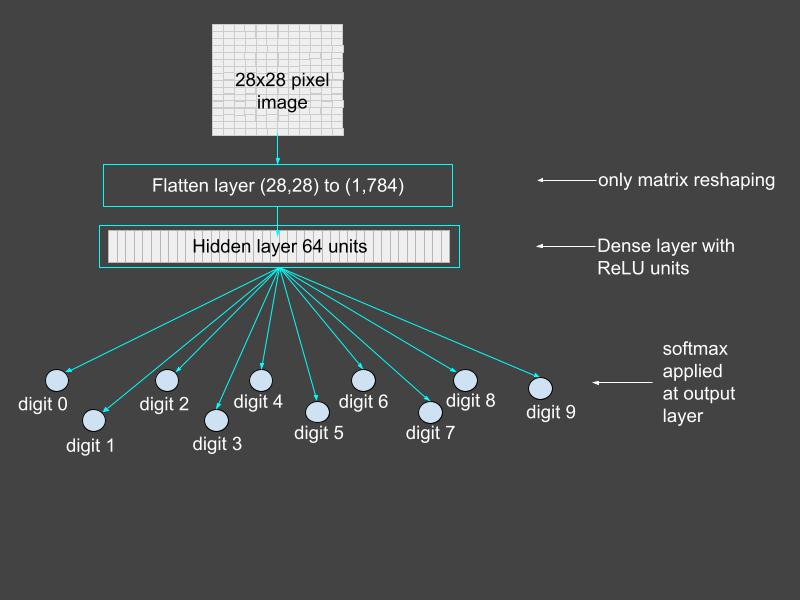


<p align = "center"> <b>Figure 1:</b> Conceptual diagram of the neural network. Each output unit corresponds to a digit and has its confidence value. 
The final classification is the digit with the maximum confidence value.</p>

# The TensorFlow and Keras Libraries

If Keras and TensorFlow are not installed on your system, you can easily do so using `pip` or `conda` depending upon your Python environment. To start the implementation, add the following import section to your code. 

In [ ]:
import tensorflow as tf
# For layers
from tensorflow.keras.layers import Flatten, Dense
# For miscellaneous functions
from tensorflow.keras import utils
# For datasets
from tensorflow.keras.datasets import mnist
# For math functions and arrays
import numpy as np
# For plotting
import matplotlib.pyplot as plt

# What Is a Tensor?

A tensor is a mathematical object that provides a simple framework for modeling physical phenomena and solving problems in mathematics and physics. In the context of ML, a tensor is a multidimensional array, which in its simplest form is a scalar. Vectors and matrices are special cases of tensors.

In TensorFlow, a tensor is a data structure. It is a multidimensional array composed of elements of the same type. The term *rank* is used to describe the number of axes in the tensor. Scalars are tensors of rank 0, vectors have rank 1, and matrices have rank 2. Generally, a tensor can define a multidimensional array of rank *n* as shown in the code below. You can use Python's standard indexing and slicing operations to access the elements of the tensor.

In [ ]:
scalar = tf.constant(0)
vector = tf.constant([0, 1, 2])
matrix = tf.constant([[0, 1], [1, 2], [2, 3]])
print('Scalar: ', scalar)
print('Vector: ', vector)
print('Matrix: ', matrix)

Scalar:  tf.Tensor(0, shape=(), dtype=int32)
Vector:  tf.Tensor([0 1 2], shape=(3,), dtype=int32)
Matrix:  tf.Tensor(
[[0 1]
 [1 2]
 [2 3]], shape=(3, 2), dtype=int32)


## Why Are Tensors Important?

In TensorFlow, tensors are used to encapsulate all inputs and outputs to a deep learning network. The training dataset and each test example has to be cast as a tensor. All operations within the layers of the network are also performed on tensors. 

## How Do I Convert Between Tensors and NumPy Arrays?

You can convert a NumPy array to a tensor using TensorFlow's `convert_to_tensor()` method, as shown in the code below. The optional argument `dtype` specifies the type of each item of the tensor.

In [ ]:
x = np.array([[1, 2], [3, 4], [5, 6]])
x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
print('NumPy array to tensor: ', x_tensor)

NumPy array to tensor:  tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float32)


Similarly, you can use the `numpy()` method to access the encapsulated array inside the tensor. Alternatively, you can retrieve the array using the `array()` method of NumPy. Below is an example of both methods:

In [ ]:
x_back_to_numpy = x_tensor.numpy()
print('Tensor to NumPy array using numpy():\n', x_back_to_numpy)
x_back_to_numpy2 = np.array(x_tensor)
print('Tensor to NumPy array using NumPy array():\n', x_back_to_numpy2)

Tensor to NumPy array using numpy():
 [[1. 2.]
 [3. 4.]
 [5. 6.]]
Tensor to NumPy array using NumPy array():
 [[1. 2.]
 [3. 4.]
 [5. 6.]]


# What Are Layers in TensorFlow?

You can build a fully connected feedforward neural network by stacking layers sequentially so that the output of one layer becomes the input to the next. In TensorFlow, layers are callable objects, which take tensors as input and generate outputs that are also tensors. Layers can contain weights and biases, which are both tuned during the training phase. We'll create a simple neural network from two layers:

1. Flatten layer
1. Dense layer

## The Flatten Layer

This layer flattens an input tensor without changing its values. Given a tensor of rank `n`, the `Flatten` layer reshapes it to a tensor of rank 2. The number of elements on the first axis remains unchanged. The elements of the input tensor's remaining axes are stacked together to form a single axis. We need this layer to create a vectorized version of each image for further input to the next layer. Below is an example.

In [ ]:
flatten_layer = Flatten()
x = tf.constant([[[0, 1], [1, 2], [2, 3]], 
                 [[10, 11], [11, 12], [12, 13]]])
x_flat = flatten_layer(x)
print('Tensor before flatten: ', x)

print('Tensor after flatten: \n', x_flat)

Tensor before flatten:  tf.Tensor(
[[[ 0  1]
  [ 1  2]
  [ 2  3]]

 [[10 11]
  [11 12]
  [12 13]]], shape=(2, 3, 2), dtype=int32)
Tensor after flatten: 
 tf.Tensor(
[[ 0  1  1  2  2  3]
 [10 11 11 12 12 13]], shape=(2, 6), dtype=int32)


## The Dense Layer

The dense layer is the fully connected, feedforward layer of a neural network. It computes the weighted sum of the inputs, adds a bias, and passes the output through an activation function. We are using the `ReLU` activation function for this example. The `ReLU` activation function does not change any value greater than 0. The rest of the values are all set to 0.

This code snippet shows how you can set up a dense layer. 

In [ ]:
# Define weights and biases for this layer
weights = tf.constant([[1, -1],[0, 1], [2, -2]])
bias = tf.constant([3, -4])
# Set up the dense layer with linear activation function
dense_layer = tf.keras.layers.Dense(units=2, activation='relu')
dense_layer.build(input_shape=(1, 3))
dense_layer.set_weights([weights, bias])

x = tf.constant([[[1, 2, -1]]])
dense_output = dense_layer(x)
print(dense_output)


tf.Tensor([[[2. 0.]]], shape=(1, 1, 2), dtype=float32)


The computations of this layer for the parameters shown in the code above are all illustrated in the figure below.

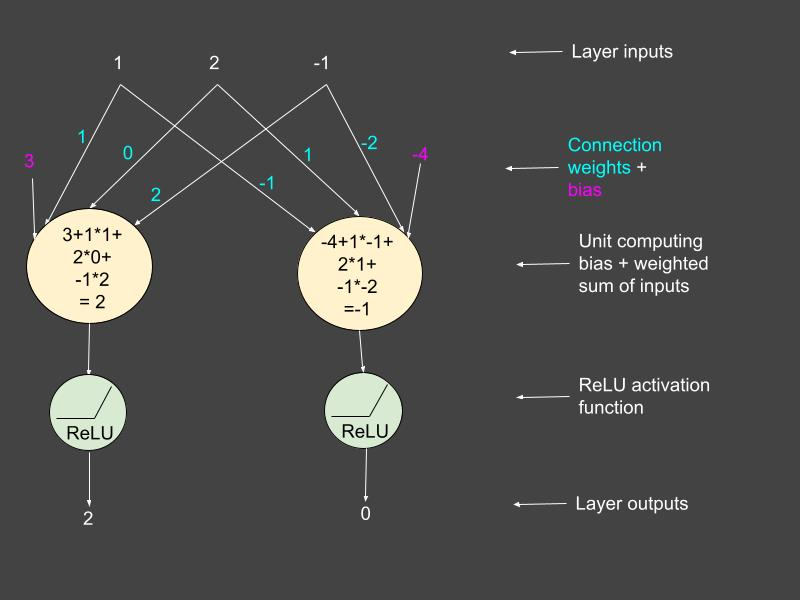

<p align = "center"> <b>Figure 2:</b> Hidden layer computations. Source: Mehreen Saeed</p>

# Creating a Model in TensorFlow

We are now ready to create a model of a simple neural network with one hidden layer. The simplest method is to use `Sequential()` with a list of all the layers you want to stack together. The code below creates a model and prints its summary. Note the use of `relu` as the activation function in the first dense layer and a `softmax` in the output layer. The `softmax` function normalizes all outputs to sum to 1 and ensures that they are in the range [0, 1].

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

The next step is to compile the model. Here, we specify the optimizer and loss function of our model. The optimization algorithm determines how the connection weights are updated at each training step with respect to the given loss function. Because we have a multiclass classification problem, the loss function we'll use is `categorical_crossentropy`, coupled with the `adam` optimizer. You can experiment with other optimizers too. The value of the metrics  argument sets the parameter to monitor and record during the training phase.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network

Now that our model is ready, it's time to train it. We'll load the dataset, train the model, and view the training process. Note that the outputs shown here will vary with every run of the program because of the stochastic nature of the algorithms involved.

## Load the Dataset
The following code loads the training set and the test set of the MNIST data. It also prints the statistics of both sets. Because our model has 10 outputs, one for each digit, we need to convert the absolute image labels to categorical ones. The `utils` module in the `Keras` library provides the method `to_categorical()` for this conversion. 

In [ ]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
train_Y_categorical = utils.to_categorical(train_Y)
test_Y_categorical = utils.to_categorical(test_Y)

print("Training data shape: ", train_X.shape)
print("Training labels shape: ", train_Y.shape)
print("Test data shape: ", test_X.shape)
print("Test labels shape: ", test_Y.shape)

11490434/11490434 [==============================] - 0s 0us/step
Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


## Train the Model

The `fit()` method of the model object trains the neural network. If you want to use a validation set during training, all you have to do is define the percentage of validation examples to be taken from the training set. The splitting of the training set into a train and validation set is automatically taken care of by the `fit()` method. 

In the code below, the `fit()` method is called with a validation split of 33% and 10 epochs. 

In [ ]:
history = model.fit(train_X, train_Y_categorical, epochs=10, validation_split=0.33)

Epoch 1/10
1257/1257 [==============================] - 6s 4ms/step - loss: 2.8884 - accuracy: 0.7564 - val_loss: 0.7589 - val_accuracy: 0.8426
Epoch 2/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.5387 - accuracy: 0.8702 - val_loss: 0.4861 - val_accuracy: 0.8844
Epoch 3/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.4049 - accuracy: 0.8964 - val_loss: 0.3840 - val_accuracy: 0.9060
Epoch 4/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.3371 - accuracy: 0.9140 - val_loss: 0.3652 - val_accuracy: 0.9146
Epoch 5/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.2948 - accuracy: 0.9245 - val_loss: 0.3571 - val_accuracy: 0.9160
Epoch 6/10
1257/1257 [==============================] - 4s 4ms/step - loss: 0.2759 - accuracy: 0.9283 - val_loss: 0.3401 - val_accuracy: 0.9215
Epoch 7/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.2516 - accuracy: 0.9343 - val_loss: 0.3148 - val_accuracy:

## View the Training Process

The `fit()` method returns a history object with detailed information regarding model training. The `history` attribute is a dictionary object. Let's look at the keys of this object.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


To view the learning process, we can plot the accuracy and loss corresponding to different epochs for both the training and validation sets. The following code creates two graphs for these two metrics.

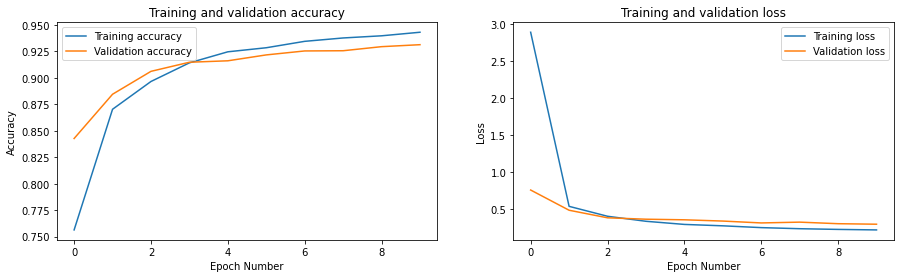

In [ ]:
fig = plt.figure(figsize=(15,4))

fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

As expected, the accuracy of the training set increases as the epochs increase. The validation accuracy is lower than the training accuracy of the final trained model.

# Evaluate the Model
This section explains various ways in which you can evaluate the model we just built.


## The `predict()` method

If you want to see the output of the network for one or more train/test examples, you can use the `predict()` method. The following example code prints the values of the output layer when the first test image is used as an input. It is a 10-dimensional vector of confidence values corresponding to each digit. The final classification of the image is the `argmax()` of this vector.

In [ ]:
predict = model.predict(test_X[:1,:,:])
print('Predict shape: ', predict.shape)
print('Prediction for first test image: \n', predict[0])
print('Classification of the first test image: digit ', np.argmax(predict[0]))

1/1 [==============================] - 0s 88ms/step
Predict shape:  (1, 10)
Prediction for first test image: 
 [2.79802728e-20 1.09399007e-05 1.86310802e-03 1.46051869e-04
 1.73890521e-06 3.56986720e-06 0.00000000e+00 9.97974455e-01
 2.85203399e-08 1.17169705e-07]
Classification of the first test image: digit  7


## The `evaluate()` method

The `evaluate()` method computes the overall accuracy of the model on the dataset passed as an argument. The code snippet below prints the classification accuracy on both the training set and the test set.

In [ ]:
train_loss, train_acc = model.evaluate(train_X,  train_Y_categorical)
test_loss, test_acc = model.evaluate(test_X,  test_Y_categorical)
print('Classification accuracy on training set: ', train_acc)
print('Classification accuracy on test set: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2494 - accuracy: 0.9420
Classification accuracy on training set:  0.9518833160400391
Classification accuracy on test set:  0.9419999718666077


## View the Confusion Matrix

TensorFlow's `math` module has the `confusion_matrix()` method that computes the confusion matrix of the classification result as shown below. 

In [ ]:
test_predict = model.predict(test_X)
# Get the classification labels
test_predict_labels = np.argmax(test_predict, axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=test_Y, predictions=test_predict_labels)
print('Confusion matrix of the test set:\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion matrix of the test set:
 tf.Tensor(
[[ 957    0    0    1    1    2    7    5    7    0]
 [   0 1108    9    2    0    2    2    1   11    0]
 [   9    3  973    4    4    0    2    8   27    2]
 [   3    3   29  891    1   25    0    4   51    3]
 [   1    1    5    1  874    0   10    5   38   47]
 [   8    6    2   17    1  815    6    2   30    5]
 [   6    3    7    0   10   22  899    0   11    0]
 [   2    5   24    7    0    0    0  971    5   14]
 [   8    3    7    5    4   14    7    9  912    5]
 [   5    5    0    9    5    4    0   35   19  927]], shape=(10, 10), dtype=int32)


# Visualize Hidden Layer Outputs

The next piece of code shows you how you can access the individual layers of the neural network we just built. The neural network is considered a black box because of the numerous computations going on inside it. It's hard to figure out exactly how it is performing classification. Our network has 64 hidden units that create a mapping of an input image to a 64-dimensional vector. There are several ways of looking at the hidden layer output. Printing its output as numbers will not be very meaningful for us. However, we can reshape this layer's output to an 8-by-8 image and display the image. 

Here is how you can access the various trained layers of the model. 

In [ ]:
flat_layer = model.layers[0]
hidden_layer = model.layers[1]
output_layer = model.layers[2]

The function `get_hidden_layer_output()` defined below ***takes as parameters the model*** and an input image as *X*. It converts *X* to a tensor and passes it through the different layers of the model. Next, it returns the output of the hidden layer and the corresponding image classification from the output layer back to the caller.

In [ ]:
def get_hidden_layer_output(model, X):  
    # Convert X to a tensor
    x = tf.convert_to_tensor(np.reshape(X, (1, 28, 28)),
                             dtype=tf.dtypes.float32)
    # Model layers
    flat_layer = model.layers[0]
    hidden_layer = model.layers[1]
    output_layer = model.layers[2]
    # Pass x through different layers
    flat_tensor = flat_layer(x)
    hidden_tensor = hidden_layer(flat_tensor)
    output_tensor = output_layer(hidden_tensor)
    predicted_digit = np.argmax(output_tensor)
    return hidden_tensor, predicted_digit

The following code renders two image rows. An input image and its true label are displayed in the first row. The hidden layer representation of each image and our neural network's classification of it are shown in the second row.

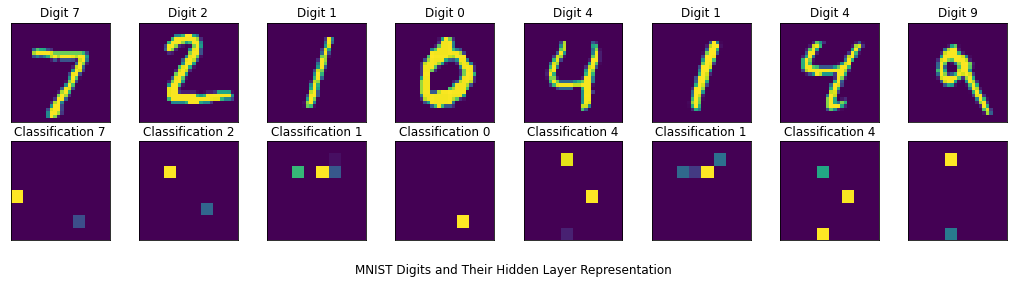

In [ ]:
total_cols = 8
fig, ax = plt.subplots(nrows=2, ncols=total_cols,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))

for j in range(total_cols):
    image = test_X[j, :, :]
    h, prediction = get_hidden_layer_output(model, image)
    ax[0, j].imshow(image)
    ax[1, j].imshow(np.reshape(h.numpy(), (8,8)))   
    ax[0, j].set_title('Digit ' + str(test_Y[j]))
    ax[1, j].set_title('Classification ' + str(prediction))
plt.title('MNIST Digits and Their Hidden Layer Representation', y=-0.4, x=-4)    
plt.show()    


The images of the hidden layer have only one to four pixels with significantly large values. The rest of the values are 0 or close to 0. Hence, we have a sparse and compressed hidden layer version of a digit's image, which is further used for classification. This illustrates the power of neural networks to map inputs to small but relevant representations for classification.